In [27]:
from diffusers import DDPMScheduler, UNet2DModel
import torch
from PIL import Image

torch.set_grad_enabled(False)

model_repo = 'google/ddpm-cat-256'
device = 'cuda'

scheduler = DDPMScheduler.from_pretrained(model_repo)
model = UNet2DModel.from_pretrained(model_repo, use_safetensors=True).to(device)

In [ ]:
scheduler.set_timesteps(50)

In [47]:
from tqdm import tqdm

gen = torch.Generator()
gen.manual_seed(1)

sample_size = model.config.sample_size
noise = torch.randn(1, 3, sample_size, sample_size, generator=gen).to(device)

for t in tqdm(scheduler.timesteps):
    noisy_residual = model(noise, t).sample
    noise = scheduler.step(noisy_residual, t, noise, generator=gen).prev_sample

100%|██████████| 200/200 [00:07<00:00, 27.08it/s]


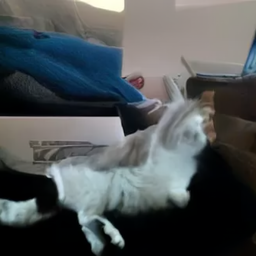

In [48]:
def to_im(tensor):
    denormalized = tensor[0] / 2 + 0.5
    denormalized = denormalized.clamp(0, 1)
    denormalized = denormalized.permute(1, 2, 0)
    denormalized = (denormalized * 255).to(torch.uint8).cpu().numpy()
    return Image.fromarray(denormalized)

to_im(noise)